In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import numpy as np
from numpy.linalg import norm 
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.measure import block_reduce
from sklearn.preprocessing import normalize
from numpy.random import randn, rand, permutation

import helperFunctions as hf

In [2]:
# # %% Load data
downScale = 3
cat = imread('Images/cat.JPG', as_gray=True)
cat = block_reduce(cat, block_size=(downScale, downScale))

flo = imread('Images/flower.JPG', as_gray=True)
flo = block_reduce(flo, block_size=(downScale, downScale))

downScale = 5
duck = imread('Images/duck.JPG', as_gray=True)
duck = block_reduce(duck, block_size=(downScale, downScale))

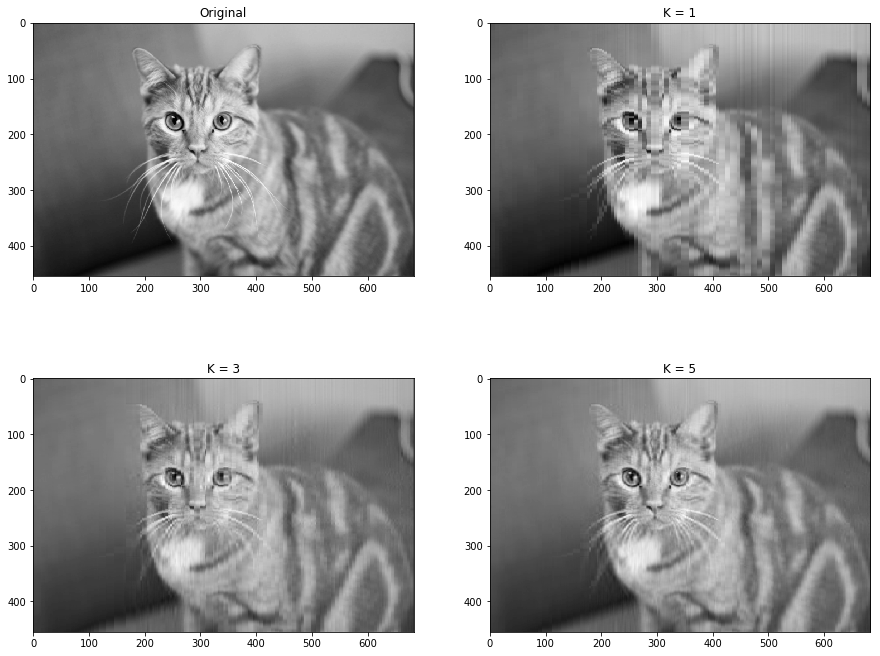

In [4]:
# Alter target sparsity level (number of atoms combined for each signal)
Ks = [1, 3, 5]
numAtoms = 100
fig, axes = plt.subplots(2, 2, figsize=(15,12))
plt.set_cmap('gray')
axes[0][0].imshow(cat)
axes[0][0].set_title('Original')
for ii, K in enumerate(Ks):
    D, Xh = hf.kSVD(cat,numAtoms,K)
    cat_recovered = D @ Xh
    jj = ii+1
    axes[jj//2][jj%2].imshow(cat_recovered)
    axes[jj//2][jj%2].set_title("K = %d"%K);

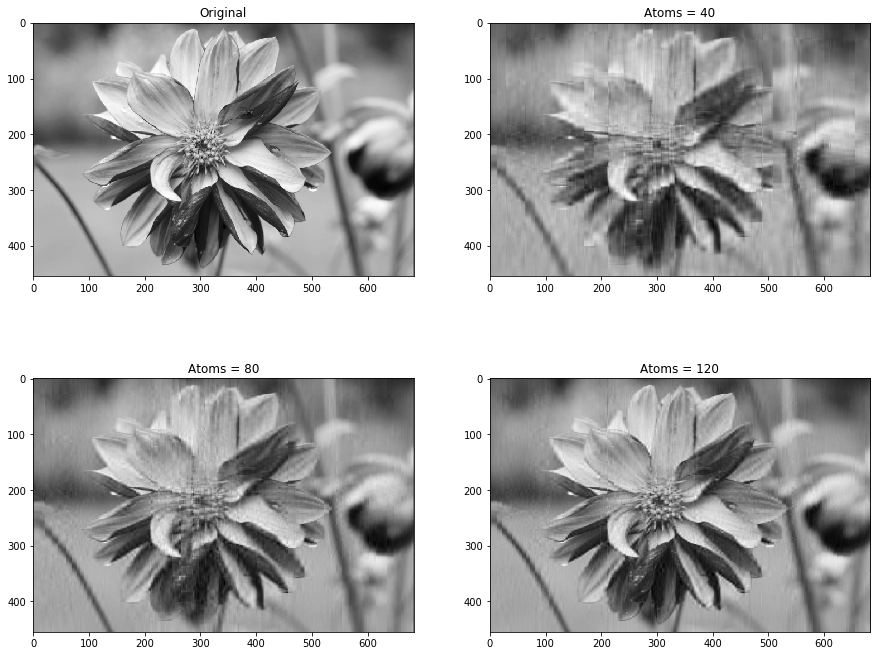

In [5]:
# Test reconstruction of various dictionary sizes
atoms = [40, 80, 120]
fig, axes = plt.subplots(2, 2, figsize=(15,12))
plt.set_cmap('gray')
axes[0][0].imshow(flo)
axes[0][0].set_title('Original')
for ii, numAtoms in enumerate(atoms):
    D, Xh = hf.kSVD(flo,numAtoms,K=5)
    flo_recovered = D @ Xh
    jj = ii+1
    axes[jj//2][jj%2].imshow(flo_recovered)
    axes[jj//2][jj%2].set_title("Atoms = %d"%numAtoms);

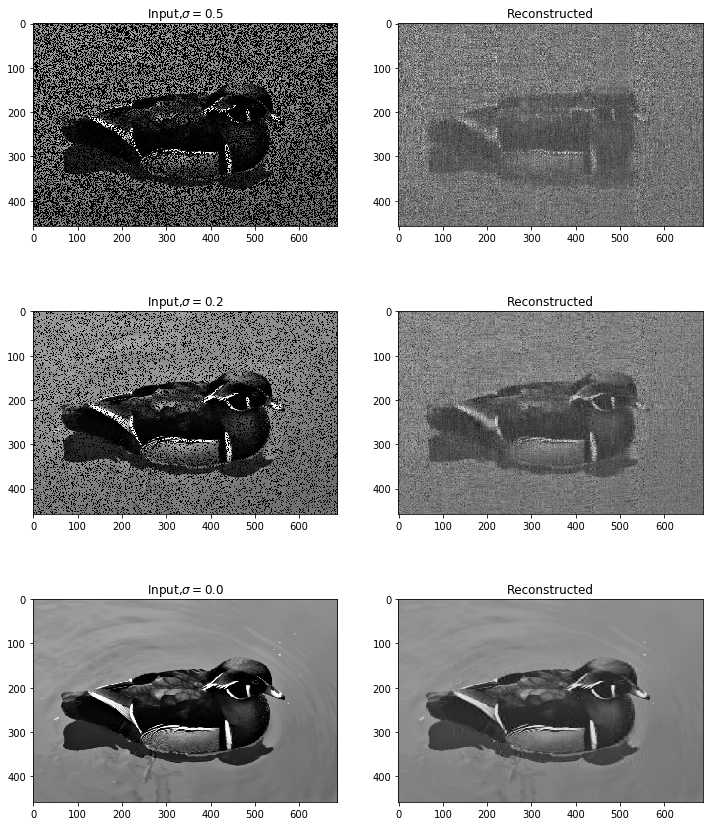

In [3]:
# Test reconstruction at various noise levels
sigmas = [0.5, 0.2, 0.00]
numAtoms = 100
fig, axes = plt.subplots(3, 2, figsize=(12,15))
plt.set_cmap('gray')
mask = np.random.rand(duck.shape[0],duck.shape[1])

for ii, sigma in enumerate(sigmas):
    tmp_mask = mask > sigma
    duck_noise = duck * tmp_mask
    
    D, Xh = hf.kSVD(duck_noise,numAtoms,K=5) # M and K to be determined
    axes[ii][0].imshow(duck_noise)
    axes[ii][0].set_title("Input,$\sigma = ${}".format(sigma))
    
    duck_recovered = D @ Xh
    axes[ii][1].imshow(duck_recovered)
    axes[ii][1].set_title("Reconstructed")